In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("D:\\EDA Mock\\Matches.csv")
df1=pd.read_csv("D:\\EDA Mock\\bowlings.csv")
mf=pd.merge(df,df1)

**1.What was the count of matches played in each season?**

In [7]:
df['season']=pd.DatetimeIndex(df['date']).year
df['season'].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: count, dtype: int64

**2.How many runs were scored in each season?**

In [10]:
mf['date']=pd.to_datetime(mf['date'])
mf['season']=mf['date'].dt.year
mf['season']

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
193463    2020
193464    2020
193465    2020
193466    2020
193467    2020
Name: season, Length: 193468, dtype: int32

In [12]:
season= mf['season'].unique()
scores = []
for var in season:
    temp_df = mf[mf['season']==var]
    runs1 = temp_df['total_runs'].sum()
    scores.append(runs1)
season = pd.DataFrame(data=scores, index=season,columns=['runs scored'])
season

,runs scored
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862
2017,18769


**3.What were the runs scored per match in different seasons?**

In [15]:
matches = mf['season'].unique()
rspm = []
for var in matches:
    temp= mf[mf['season']==var]
    temp = temp[temp['season'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
    runs1 = temp['total_runs'].sum()
    rspm.append(runs1)
matches = pd.DataFrame(data=rspm, index=matches,columns=['runs scored per match'])
matches

,runs scored per match
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862
2017,18769


**4.Who has umpired the most?**

**Answer: S Ravi by 121 Times**

In [18]:
u=pd.concat([df['umpire1'],df['umpire2']])
u.value_counts()

S Ravi                   121
HDPK Dharmasena           94
AK Chaudhary              87
C Shamshuddin             82
M Erasmus                 65
CK Nandan                 57
Nitin Menon               57
SJA Taufel                55
Asad Rauf                 51
VA Kulkarni               50
BNJ Oxenford              48
CB Gaffaney               47
RJ Tucker                 46
BR Doctrove               42
RE Koertzen               41
Aleem Dar                 38
BF Bowden                 37
NJ Llong                  37
KN Ananthapadmanabhan     33
RK Illingworth            31
SK Tarapore               31
RB Tiffin                 30
S Asnani                  30
AY Dandekar               28
DJ Harper                 27
AM Saheba                 26
VK Sharma                 26
A Nand Kishore            25
PR Reiffel                24
K Hariharan               21
YC Barde                  19
SS Hazare                 17
BG Jerling                17
JD Cloete                 17
K Srinath     

**5.Which team has won the most tosses**

**Answer:Mumbai Indians 106 times**

In [21]:
df['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

**6.What does the team decide after winning the toss?**

In [24]:
t=df.loc[df['toss_winner']=='Mumbai Indians','toss_decision'].value_counts()
t

toss_decision
field    58
bat      48
Name: count, dtype: int64

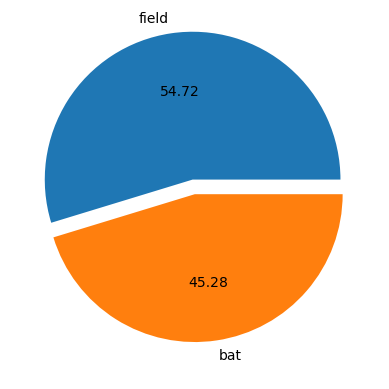

In [26]:
labels=['field','bat']
explode=[0.1,0]
plt.pie(t,labels=labels,explode=explode,autopct='%.2f')
plt.show()

**7.How toss decision varies across seasons?**

In [29]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['year']
df.loc[df['toss_decision']=='field','year'].value_counts()

year
2018    50
2019    50
2016    49
2011    48
2017    48
2014    41
2012    37
2015    34
2020    33
2008    32
2013    31
2009    22
2010    21
Name: count, dtype: int64

In [31]:
df.loc[df['toss_decision']=='bat','year'].value_counts()

year
2013    45
2010    39
2012    37
2009    35
2020    27
2008    26
2011    25
2015    25
2014    19
2016    11
2017    11
2018    10
2019    10
Name: count, dtype: int64

**8.Does winning the toss implies winning the game?**

In [34]:
mf['toss_win_game_win'] = np.where((mf.toss_winner == mf.winner),'Yes','No')
mf.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season,toss_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,No
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,No
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,No
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,No
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,No


**9.How many times chasing team has won the match?**

**Answer: Mumbai Indians with 70 Times**

In [37]:
df.loc[df['toss_decision']=='field','winner'].value_counts()

winner
Mumbai Indians                 70
Kings XI Punjab                64
Kolkata Knight Riders          61
Royal Challengers Bangalore    60
Chennai Super Kings            51
Rajasthan Royals               44
Sunrisers Hyderabad            43
Delhi Daredevils               38
Deccan Chargers                15
Delhi Capitals                 14
Gujarat Lions                  11
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Pune Warriors                   3
Rising Pune Supergiants         3
Name: count, dtype: int64

**10.Which all teams had won this tournament?**

**Answer: Mumbai Indians with 5 Times**

In [40]:
ws = mf[['season','winner']]

#dictionaries to get winners to each season
wt = {}
for i in sorted(ws.season.unique()):
    wt[i] = ws[ws.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(wt)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

In [42]:
winners_of_IPL.value_counts()

team                 
Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: count, dtype: int64

**11.Which team has played the most number of matches?**

**Answer:Mumbai Indians with 203**

In [45]:
mp=pd.concat([df['team1'],df['team2']])
mp.value_counts()

Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

**12.Which team has won the most number of times?**

**Answer: Mumbai Indians with 120 times**

In [48]:
w=df['winner'].value_counts()
w

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

**13.Which team has the highest winning percentage?**

In [51]:
w1=w.head(10)
w1

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Name: count, dtype: int64

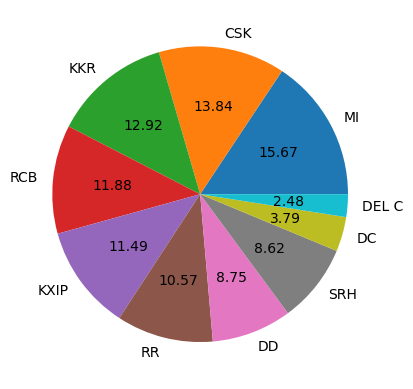

In [53]:
import matplotlib.pyplot as plt
labels=['MI','CSK','KKR','RCB','KXIP','RR','DD','SRH','DC','DEL C']
plt.pie(w1,labels=labels,autopct='%.2f')
plt.show()

**14.Is there any lucky venue for a particular team?**

In [56]:
matches = mf['id'].unique()
rspm = []
for var in matches:
    temp= mf[mf['id']==var]
    temp = temp[temp['season'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
    runs1 = temp['total_runs'].sum()
    rspm.append(runs1)
matches = pd.DataFrame(data=rspm, index=matches,columns=['runs scored per match'])
matches

,runs scored per match
335982,304
335983,447
335984,261
335985,331
335986,222
...,...
1216547,402
1237177,343
1237178,263
1237180,361


In [57]:
mi=df.loc[df['winner']=='Mumbai Indians','venue'].value_counts()
mi.head(5)

venue
Wankhede Stadium                             42
Eden Gardens                                 10
M Chinnaswamy Stadium                         8
Rajiv Gandhi International Stadium, Uppal     7
Brabourne Stadium                             6
Name: count, dtype: int64

**15.Comparison between two teams**

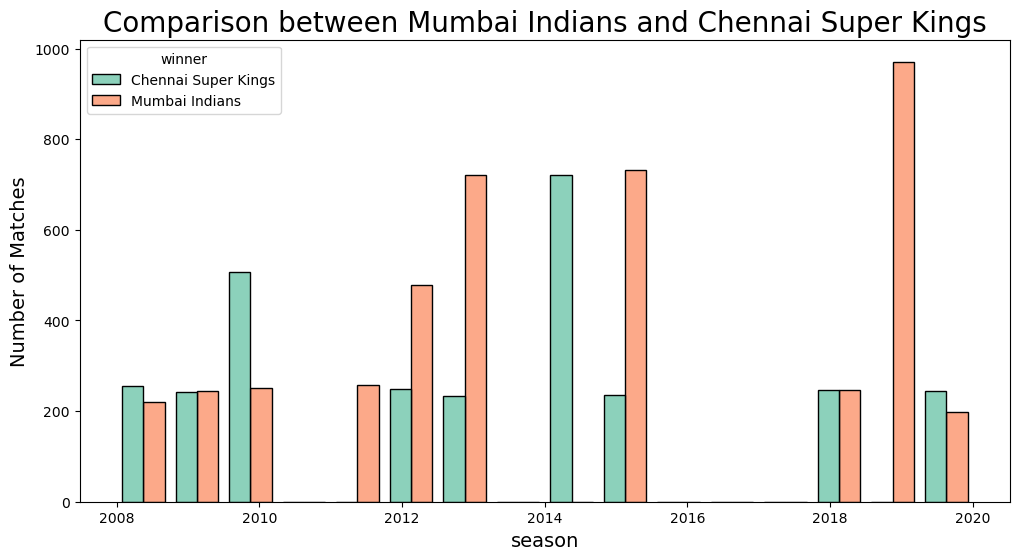

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def comparison(team1, team2, match_data):
    
    compare = mf[((match_data['team1'] == team1) | (match_data['team2'] == team1)) & ((match_data['team1'] == team2) | (match_data['team2'] == team2))]

    plt.figure(figsize=(12, 6))
    sns.histplot(data=compare, x='season', hue='winner', multiple='dodge', 
                 shrink=0.8, bins=16, edgecolor='black', palette='Set2')

    plt.title(f'Comparison between {team1} and {team2}', fontsize=20)
    plt.xlabel('season', fontsize=14)
    plt.ylabel('Number of Matches', fontsize=14)
    plt.show()
comparison('Mumbai Indians', 'Chennai Super Kings', mf)


**16.Particular Batsmen analysis**

In [68]:
df1[df1['batsman']=='CH Gayle']

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
14141,392184,1,0,3,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14142,392184,1,0,4,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14143,392184,1,0,5,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14144,392184,1,0,6,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14147,392184,1,1,3,CH Gayle,SC Ganguly,RP Singh,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192185,1216546,2,4,5,CH Gayle,MA Agarwal,TU Deshpande,6,0,6,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Delhi Capitals
192186,1216546,2,4,6,CH Gayle,MA Agarwal,TU Deshpande,0,1,1,0,0,NaN,NaN,NaN,wides,Kings XI Punjab,Delhi Capitals
192187,1216546,2,4,7,CH Gayle,MA Agarwal,TU Deshpande,1,0,1,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Delhi Capitals
192188,1216546,2,5,1,CH Gayle,MA Agarwal,R Ashwin,2,0,2,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Delhi Capitals


In [70]:
df1.loc[df1['batsman']=='CH Gayle','batsman_runs'].sum()

4772

In [72]:

gayle=(df1['batsman']=='CH Gayle')
chgayle=df1[gayle]
chgayle.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
14141,392184,1,0,3,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14142,392184,1,0,4,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14143,392184,1,0,5,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14144,392184,1,0,6,CH Gayle,BB McCullum,FH Edwards,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers
14147,392184,1,1,3,CH Gayle,SC Ganguly,RP Singh,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Deccan Chargers


In [74]:
len(chgayle[chgayle['batsman_runs']==4])

384

In [76]:
len(chgayle[chgayle['batsman_runs']==6])

349

In [78]:
df1.loc[df1['bowler']=='CH Gayle','is_wicket'].sum()

19

**17.Innings wise comparison between teams**

In [81]:
compare=df1.groupby(['id','inning','batting_team'])[['total_runs']].sum().reset_index()
compare.head(10)

,id,inning,batting_team,total_runs
0,335982,1,Kolkata Knight Riders,222
1,335982,2,Royal Challengers Bangalore,82
2,335983,1,Chennai Super Kings,240
3,335983,2,Kings XI Punjab,207
4,335984,1,Rajasthan Royals,129
5,335984,2,Delhi Daredevils,132
6,335985,1,Mumbai Indians,165
7,335985,2,Royal Challengers Bangalore,166
8,335986,1,Deccan Chargers,110
9,335986,2,Kolkata Knight Riders,112


18.Which team has scored the most number of 200+ scores?

In [84]:
sc=df1.groupby(['batting_team','bowling_team'])['total_runs'].sum().reset_index() 
most_no=sc[sc['total_runs']>=200]
most_no

,batting_team,bowling_team,total_runs
0,Chennai Super Kings,Deccan Chargers,1592
1,Chennai Super Kings,Delhi Capitals,790
2,Chennai Super Kings,Delhi Daredevils,2928
3,Chennai Super Kings,Kings XI Punjab,3888
4,Chennai Super Kings,Kochi Tuskers Kerala,283
...,...,...,...
155,Sunrisers Hyderabad,Pune Warriors,245
156,Sunrisers Hyderabad,Rajasthan Royals,1960
157,Sunrisers Hyderabad,Rising Pune Supergiant,312
158,Sunrisers Hyderabad,Rising Pune Supergiants,255


**19.Which team has conceded 200+ scores the most?**

In [87]:
con=most_no['bowling_team'].value_counts()
con=pd.DataFrame(con)
con

,count
bowling_team,
Kolkata Knight Riders,14
Royal Challengers Bangalore,14
Delhi Daredevils,13
Kings XI Punjab,13
Mumbai Indians,13
Sunrisers Hyderabad,12
Rajasthan Royals,11
Chennai Super Kings,11
Pune Warriors,9


**20.What was the highest run scored by a team in a single match?**
**Answer: 263 runs**

In [90]:
hteam=df1.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
hteam['total_runs'].max()

263

**21.Which is the biggest win in terms of run margin?**

In [93]:
df[df['result_margin']==df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,year
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017,2017


**22.Which batsmen have played the most number of balls?**

**Answer:A Ashish Reddy**

In [96]:
ba=df1.groupby(['batsman'])['ball'].count().reset_index()
ba

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
532,YV Takawale,183
533,Yashpal Singh,67
534,Younis Khan,7
535,Yuvraj Singh,2205


**23.Who are the leading run-scorers of all time?**

**Answer:A Ashish Reddy**

In [99]:
highr=df1.groupby(['batsman'])['batsman_runs'].sum().reset_index()
highr

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,192
533,Yashpal Singh,47
534,Younis Khan,3
535,Yuvraj Singh,2750


**24.Who has hit the most number of 4's?**

**Answer: S Dhawan with 591**

In [102]:
df1.loc[df1['batsman_runs']==4,'batsman'].value_counts()

batsman
S Dhawan        591
DA Warner       510
V Kohli         504
SK Raina        493
G Gambhir       492
               ... 
A Choudhary       1
DM Bravo          1
Basil Thampi      1
DE Bollinger      1
Ravi Bishnoi      1
Name: count, Length: 424, dtype: int64

**25.Who has hit the most number of 6's?**

**Answer: CH Gayle**

In [105]:
df1.loc[df1['batsman_runs']==6,'batsman'].value_counts()

batsman
CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
                 ... 
CK Langeveldt       1
A Mithun            1
WD Parnell          1
BJ Haddin           1
AT Carey            1
Name: count, Length: 351, dtype: int64

**26.Who has the highest strike rate?**

In [108]:
runs=df1.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']

balls_played=df1.groupby(['batsman'])['ball'].count().reset_index()
four=df1[df1['batsman_runs']==4]

runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman','4s']

six=df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()

player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ball']*100


player.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ball,4s,batsman_runs,strike_rate
72,B Stanlake,5,2,3.0,0,250.000000
504,Umar Gul,39,19,NaN,5,205.263158
395,RS Sodhi,4,2,1.0,0,200.000000
470,Shahid Afridi,81,46,NaN,6,176.086957
175,I Malhotra,7,4,13.0,0,175.000000
498,TU Deshpande,21,12,NaN,1,175.000000
33,AD Russell,1517,882,24.0,129,171.995465
253,LJ Wright,106,63,4.0,3,168.253968
57,Abdul Samad,111,66,28.0,6,168.181818
235,KMDN Kulasekara,5,3,156.0,0,166.666667


**27.Who is the leading wicket-taker?**

In [111]:
df1['dismissal_kind'].value_counts()

dismissal_kind
caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: count, dtype: int64

In [113]:
bowled=['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
wic=df1[df1["dismissal_kind"].isin(bowled)]
bo=wic['bowler'].value_counts()
bo

bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
                  ... 
AA Noffke            1
SS Sarkar            1
AM Rahane            1
LA Carseldine        1
JR Hazlewood         1
Name: count, Length: 360, dtype: int64

**28.Which stadium has hosted the most number of matches?**

**Answer Eden Gardens with 77 times**

In [116]:
df['venue'].value_counts()

venue
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                         

**29.Who has won the most MOM awards?**

**Answer: AB de Villiers with 23**

In [119]:
df['player_of_match'].value_counts()

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: count, Length: 233, dtype: int64

**30.What is the count of fours hit in each season?**

In [122]:
mf.loc[mf['batsman_runs']==4,'season'].value_counts()

season
2013    2052
2011    1916
2012    1911
2010    1708
2008    1703
2019    1653
2018    1652
2016    1633
2017    1611
2015    1607
2020    1583
2014    1562
2009    1317
Name: count, dtype: int64

**31.What is the count of sixes hit in each season?**

In [125]:
mf.loc[mf['batsman_runs']==6,'season'].value_counts()

season
2018    872
2019    784
2020    735
2012    733
2014    714
2017    705
2015    692
2013    675
2011    639
2016    639
2008    623
2010    585
2009    506
Name: count, dtype: int64

**32.What is the count of runs scored from boundaries in each season?**

In [ ]:
data_6 = mf['season'].unique()
sixes_list = []
for var in data_6:
    new_df = mf[mf['season']==var]
    total_sixes = 0
    for i in new_df['id'].values:
        temp_df = mf[mf['id']==i]
        sixes = temp_df[temp_df['batsman_runs']==6]['batsman_runs'].count()
        total_sixes+=sixes
    sixes_list.append(total_sixes)

In [129]:
data_4 = mf['season'].unique()
fours_list = []
for var in data_4:
    new_df = mf[mf['season']==var]
    total_fours = 0
    for i in new_df['id'].values:
        temp_df = mf[mf['id']==i]
        fours = temp_df[temp_df['batsman_runs']==4]['batsman_runs'].count()
        total_fours+=fours
    fours_list.append(total_fours)

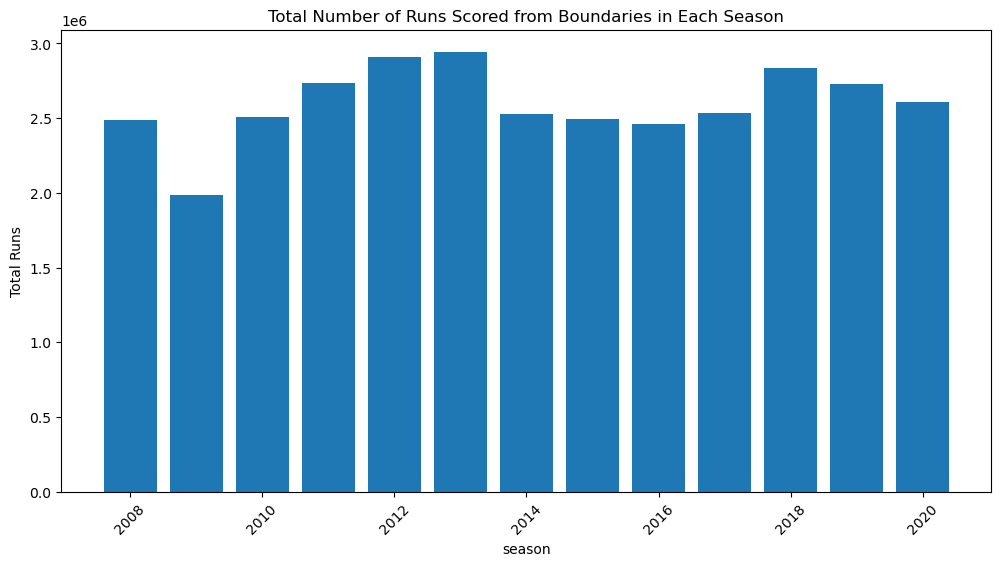

In [130]:

runs4=np.dot(fours_list,4)
runs6=np.dot(sixes_list,6)
k=runs4+runs6
Y=mf['season'].unique()

plt.figure(figsize=(12, 6))
plt.bar(Y, k)
plt.xlabel("season")
plt.ylabel("Total Runs")
plt.title("Total Number of Runs Scored from Boundaries in Each Season")
plt.xticks(rotation=45)
plt.show()

**33.What is the run contribution from boundaries in each season?**

In [132]:
bound_score= mf['season'].unique()
boundary = []
for var in bound_score:
    score = mf[mf['season']==var]
    score = score[score['batsman_runs'].isin([4,6])]
    runs = score['batsman_runs'].sum()
    boundary.append(runs)
bound_score = pd.DataFrame(data=boundary, index=bound_score,columns=['count of runs scored in boundaries'])
bound_score

,count of runs scored in boundaries
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366
2017,10674


**34.Which team has scored the most runs in the first 6 overs?**

In [134]:
team = df1['batting_team'].unique()
r = []
for var in team:
    bat_team = df1[df1['batting_team']==var]
    bat_team = bat_team[bat_team['over'].isin([0,1,2,3,4,5])]
    runs = bat_team['total_runs'].sum()
    r.append(runs)
team = pd.DataFrame(data=r, index=team,columns=['Runs In First 6 Overs'])
team

,Runs In First 6 Overs
Kolkata Knight Riders,8871
Royal Challengers Bangalore,8699
Kings XI Punjab,8907
Chennai Super Kings,8048
Rajasthan Royals,7151
Delhi Daredevils,7349
Mumbai Indians,9204
Deccan Chargers,3417
Kochi Tuskers Kerala,680
Pune Warriors,1895


**35.Which team has scored the most runs in the last 4 overs?**

In [136]:
team1 = df1['batting_team'].unique()
r1 = []
for var in team1:
    bat_team = df1[df1['batting_team']==var]
    bat_team= bat_team[bat_team['over'].isin([19,18,17,16])]
    runs1 = bat_team['total_runs'].sum()
    r1.append(runs1)
team1 = pd.DataFrame(data=r1, index=team1,columns=['Runs In Last 4 Overs'])
team1

,Runs In Last 4 Overs
Kolkata Knight Riders,6224
Royal Challengers Bangalore,6787
Kings XI Punjab,6227
Chennai Super Kings,6655
Rajasthan Royals,5043
Delhi Daredevils,5043
Mumbai Indians,7538
Deccan Chargers,2539
Kochi Tuskers Kerala,337
Pune Warriors,1360


**36.Which team has the best scoring run-rate in the first 6 overs?
37.Which team has the best scoring run-rate in the last 4 overs?**

In [138]:
team = mf['batting_team'].unique()
team_runs = []
for var in team:
    temp_df = mf[mf['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([0,1,2,3,4,5])]
    runs = temp_df['total_runs'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In First 6 Overs'])
team.index.name = 'Team'

In [149]:
team1 = mf['batting_team'].unique()
team_runs1 = []
for var in team1:
    temp_df = mf[mf['batting_team']==var]
    temp_df = temp_df[temp_df['over'].isin([19,18,17,16])]
    runs1 = temp_df['total_runs'].sum()
    team_runs1.append(runs1)
team1 = pd.DataFrame(data=team_runs1, index=team1,columns=['Runs In Last 4 Overs'])
team1.index.name = 'Team'

In [153]:
wins = pd.DataFrame(mf['winner'].value_counts()).reset_index()
wins.columns = ['Team Name', 'Wins']

matches_played_byteams=pd.concat([mf['team1'],mf['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']

played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
p1=played.merge(team,left_on='Team Name',right_on='Team',how='inner')
p2=p1.merge(team1,left_on='Team Name',right_on='Team',how='inner')
mostruns=np.dot(p2['Total Matches played'],6)
mostrun=np.dot(p2['Total Matches played'],4)
p2['RR in first 6 overs']=(p2['Runs In First 6 Overs']/mostruns)
p2['RR in last 4 overs']=(p2['Runs In Last 4 Overs']/mostrun)
p2

,Team Name,Total Matches played,Wins,Runs In First 6 Overs,Runs In Last 4 Overs,RR in first 6 overs,RR in last 4 overs
0,Chennai Super Kings,42679,25531,8048,6655,0.031428,0.038983
1,Deccan Chargers,18073,7013,3417,2539,0.031511,0.035121
2,Delhi Capitals,8020,4663,1560,1160,0.032419,0.036160
3,Delhi Daredevils,37499,15709,7349,5043,0.032663,0.033621
4,Gujarat Lions,7098,3063,1553,921,0.036466,0.032439
5,Kings XI Punjab,45079,20904,8907,6227,0.032931,0.034534
6,Kochi Tuskers Kerala,3196,1322,680,337,0.035461,0.026361
7,Kolkata Knight Riders,45137,23358,8871,6224,0.032756,0.034473
8,Mumbai Indians,48919,28885,9204,7538,0.031358,0.038523
9,Pune Warriors,10900,2883,1895,1360,0.028976,0.031193
